Contenido bajo licencia Creative Commons BY 4.0 y código bajo licencia MIT. © Nicolás Guarín-Zapata 2026.

# Solución de sistemas no-lineales

Considere dos resortes no-lineales conectados en serie.


<img title="Dos resortes no-lineales." width=600 alt="Resortes no-lineales en serie." src="img/resortes_no-lineales.png">

La rigidez de ambos resortes depende de la elongación, de modo que
$k_1 = 50 + 500u\, \text{[N/m]}$ y $k_2 = 1000 + 200u\, \text{[N/m]}$, donde
$u$ es la elongación del resorte. La ecuación para un resorte es

$$\begin{bmatrix}
k &-k\\
-k &k\end{bmatrix}
\begin{Bmatrix}u_1\\ u_2\end{Bmatrix}
= \begin{Bmatrix}f_1\\ f_2\end{Bmatrix}\, ,$$

donde $u_1$ y $u_2$ son desplazamientos los dos nodos.

Queremos construir el sistema de ecuaciones y resolverlo para una fuerza de
$F = 100\, \text{N}$.

## Solución

El resorte 1 está fijo en la pared, por lo que su elongación es equivalente a $u_1$, mientras que para el resorte 2, la elongación es $u_2 - u_1$. El sistema de ecuaciones está dado por:

$$\begin{bmatrix}
50 + 500u_1 + 100 + 200(u_2 - u_1) &-100 - 200(u_2 - u_1)\\
-100 - 200(u_2 - u_2) &100 + 200(u_2 - u_1)\end{bmatrix}
\begin{Bmatrix}u_1\\ u_2\end{Bmatrix}
= \begin{Bmatrix}0\\ F\end{Bmatrix}\, .$$

A diferencia del caso de los resortes lineales, aquí la matriz de rigidez no es una constante, sino una función de $u_1$ y $u_2$. Podemos reescribir este sistema como

\begin{align}
300 u_1^2 + 400 u_1 u_2 - 200 u_2^2 + 150 u_1 - 100 u_2 = 0\, ,\\
200 u_1^2 - 400 u_1 u_2 + 200 u_2^2 - 100 u_1 + 100 u_2 = 100\, .
\end{align}

Esto se puede reescribir como la función vectorial no lineal:

$$\mathbf{P}(\mathbf{u}) = \mathbf{f}\, .$$

En el contexto de la mecánica, podemos interpretar $\mathbf{P}(\mathbf{u})$ como el vector de fuerzas internas que aparecen cuando el desplazamiento es $\mathbf{u}$, y $\mathbf{f}$ como el vector de fuerzas externas.

In [1]:
%matplotlib widget

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
import pandas as pd

### Visualizando la solución

Dado que se trata de un sistema no lineal, podríamos tener múltiples soluciones.
Podemos visualizar los conjuntos de nivel (en este caso, curvas de nivel) de
ambas funciones. Su intersección corresponde a las soluciones del problema.

In [3]:
u2, u1 = 1.5 * np.mgrid[-1:1:201j, -1:1:201j]

In [4]:
F1 = 300*u1**2 + 400*u1*u2 - 200*u2**2 + 150*u1 - 100*u2
F2 = 200*u1**2 - 400*u1*u2 + 200*u2**2 - 100*u1 + 100*u2

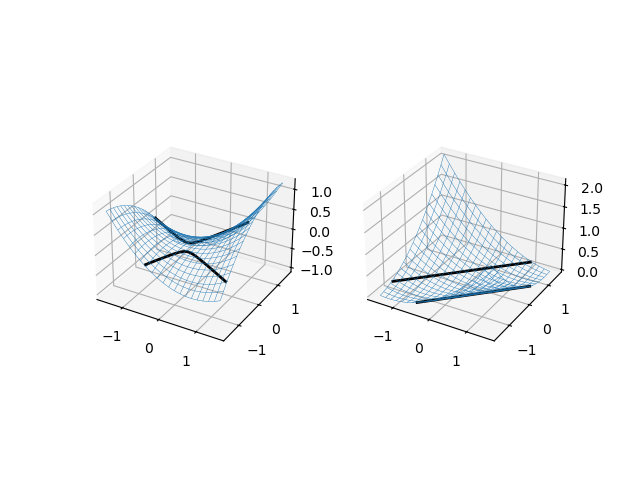

In [5]:
fig, ax = plt.subplots(1, 2, subplot_kw={"projection": "3d"})
ax[0].plot_wireframe(u1, u2, F1/1000, rstride=10, cstride=10, lw=0.3)
ax[0].contour(u1, u2, F1/1000, [0], colors="black", linewidths=2)
ax[1].plot_wireframe(u1, u2, F2/1000, rstride=10, cstride=10, lw=0.3)
ax[1].contour(u1, u2, F2/1000, [0.1], colors="black", linewidths=2)
plt.show()

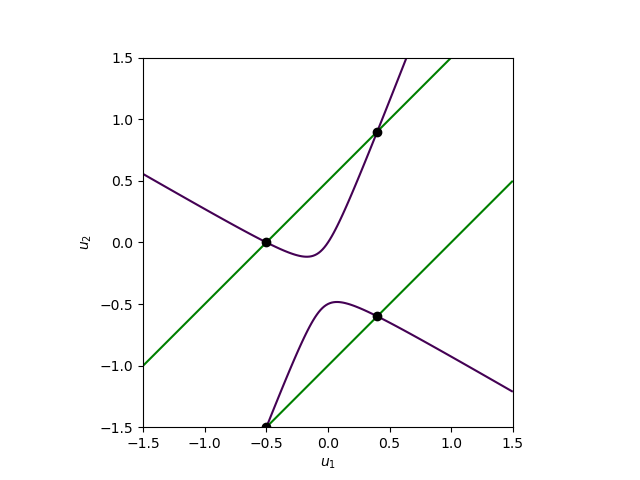

In [6]:
plt.figure()
plt.contour(u1, u2, F1, [0])
plt.contour(u1, u2, F2, [100], colors="green")
plt.xlabel("$u_1$")
plt.ylabel("$u_2$")
plt.axis("image")
plt.plot([2/5, -1/2, 2/5, -1/2],
         [9/10, 0, -3/5, -3/2],
         "ok")
plt.show()

Podemos ver que las intersecciones corresponden a las soluciones analíticas,
que podemos calcular en este caso, pero no en el caso general.

Podemos usar SymPy para encontrar la solución de este problema en particular.

In [7]:
x1, x2 = sym.symbols("x1, x2")
eqs = [300*x1**2 + 400*x1*x2 - 200*x2**2 + 150*x1 - 100*x2,
       200*x1**2 - 400*x1*x2 + 200*x2**2 - 100*x1 + 100*x2 - 100]

sols = sym.solve(eqs, [x1, x2])
sols

[(-1/2, -3/2), (-1/2, 0), (2/5, -3/5), (2/5, 9/10)]

### Solución utilizando el método de Newton-Raphson


Para resolver el problema mediante el método de Newton-Raphson, podemos linealizar la
función no lineal $\mathbf{P}$ alrededor de $\mathbf{u}^{i + 1}$ truncando la serie de Taylor después de los términos lineales:

$$\mathbf{P}(\mathbf{u}^{i + 1}) \approx \mathbf{P}(\mathbf{u}^i) + \mathbf{K}_T^i \Delta \mathbf{u}^i
= \mathbf{f}\, ,$$

donde $\mathbf{K}_T^i \equiv (\partial\mathbf{P}/\partial\mathbf{u})^i$ es la matriz jacobiana
en la $i$-ésima iteración, conocida como matriz de rigidez tangente en la comunidad de mecánica.
El vector de desplazamiento se actualiza en cada iteración como:

$$ \mathbf{u}^{i + 1} = \mathbf{u}^i + \Delta\mathbf{u}^i\, ,$$

siendo $\Delta\mathbf{u}^i$ el $i$-ésimo incremento de la solución.

La diferencia entre el lado izquierdo y el derecho se denomina residuo

$$\mathbf{R}^{i + 1} = \mathbf{f} - \mathbf{P}(\mathbf{u}^{i + 1})\, ,$$

y, en general, no es nulo. Cuando esto sucede, obtenemos una solución exacta de la ecuación no lineal.
Iteraremos hasta que $\mathbf{R}$ sea lo suficientemente pequeño según un criterio dado.

Para utilizar el método de Newton-Raphson, necesitamos la matriz de rigidez tangente. Su derivación
puede ser compleja para funciones no lineales generales. En Python, podemos usar SymPy para esto.
La clase ``Matrix`` tiene el método ``jacobian``, que podemos usar para esta tarea.

In [8]:
sym.solve(sym.Matrix(eqs).jacobian((x1, x2)).det(), (x1, x2))

[(-1/20, x2), (x1, x1 - 1/4)]

In [9]:
sym.Matrix(eqs).jacobian((x1, x2))

Matrix([
[600*x1 + 400*x2 + 150,  400*x1 - 400*x2 - 100],
[400*x1 - 400*x2 - 100, -400*x1 + 400*x2 + 100]])

La siguiente celda tiene todas las funciones que necesitamos para implementar el método de Newton-Raphson para el problema de interés.

In [10]:
def internal_force(u):
    u1, u2 = u
    return np.array([
        300*u1**2 + 400*u1*u2 - 200*u2**2 + 150*u1 - 100*u2,
        200*u1**2 - 400*u1*u2 + 200*u2**2 - 100*u1 + 100*u2])


def jacobian(u):
    u1, u2 = u
    return np.array([
        [600*u1 + 400*u2 + 150, 400*(u1 - u2) - 100],
        [400*(u1 - u2) - 100, 400*u2 - 400*u1 + 100]])


def residual(u):
    return f - internal_force(u)


def conv_error(u):
    R = residual(u)
    return R.dot(R)/(1 + f.dot(f))
    

In [11]:
tol = 1e-5
niter = 20
u = np.array([0.0, 0.0])
f = np.array([0, 100])

In [12]:
u_old = u.copy()
conv = conv_error(u)
status = [[u[0], u[1], conv]]
for cont in range(niter):
    Δu = np.linalg.solve(jacobian(u), residual(u))
    u = u_old + Δu
    conv = conv_error(u)
    u_old = u.copy()
    status.append([u[0], u[1], conv])
    if conv < tol:
        break

In [13]:
pd.DataFrame(status, columns=("$u_1$", "$u_2$", "$R^2/(1 + f^2)$"))

,$u_1$,$u_2$,$R^2/(1 + f^2)$
0,0.000000,0.000000,9.999000e-01
1,2.000000,3.000000,3.279672e+02
2,1.024390,1.624390,1.980578e+01
3,0.581435,1.087317,9.282299e-01
4,0.426066,0.926089,1.454959e-02
5,0.400714,0.900714,1.032767e-05
6,0.400001,0.900001,6.462284e-12


### Convergencia

Un concepto importante en la solución de problemas no lineales es la _convergencia_.
Antes, usamos el residuo normalizado para determinar si la solución era suficientemente
buena, es decir:

$$e_R = \frac{\Vert \mathbf{R}^{i + 1}\Vert^2}{1 + \Vert \mathbf{f} \Vert^2}\, ,$$

donde sumamos 1 al denominador para evitar dividir por cero cuando no hay cargas aplicadas.

Podemos convertir lo que hicimos antes en una función. La siguiente celda presenta dicha función.

In [14]:
def newton_nonlin_springs(f, u=(0, 0), tol=1e-5, niter=20):
    f = np.asarray(f)
    u = np.asarray(u)
    u_old = u.copy()
    conv = conv_error(u)
    status = [[u[0], u[1], conv]]
    for cont in range(niter):
        Δu = np.linalg.solve(jacobian(u), residual(u))
        u = u_old + Δu
        conv = conv_error(u)
        u_old = u.copy()
        status.append([u[0], u[1], conv])
        if conv < tol:
            break
    return u, status

In [15]:
u_ap, status = newton_nonlin_springs((0, 100))
status = np.array(status)
pd.DataFrame(status)

,0,1,2
0,0.000000,0.000000,9.999000e-01
1,2.000000,3.000000,3.279672e+02
2,1.024390,1.624390,1.980578e+01
3,0.581435,1.087317,9.282299e-01
4,0.426066,0.926089,1.454959e-02
5,0.400714,0.900714,1.032767e-05
6,0.400001,0.900001,6.462284e-12


Se dice que el método de Newton-Raphson tiene convergencia cuadrática cuando el punto de
partida está suficientemente cerca de la raíz. Numéricamente, esto implica que la siguiente
razón tiende a una constante:

$$\frac{\Vert \mathbf{u}_\text{exact} - \mathbf{u}^{n + 1}\Vert}{\Vert \mathbf{u}_\text{exact} - \mathbf{u}^{n + 1}\Vert^2}\, ,$$

Es decir, el siguiente límite existe:

$$\lim_{n \rightarrow \infty} \frac{\Vert \mathbf{u}_\text{exact} - \mathbf{u}^{n + 1}\Vert}
{\Vert \mathbf{u}_\text{exact} - \mathbf{u}^{n + 1}\Vert^2} = c\, .$$

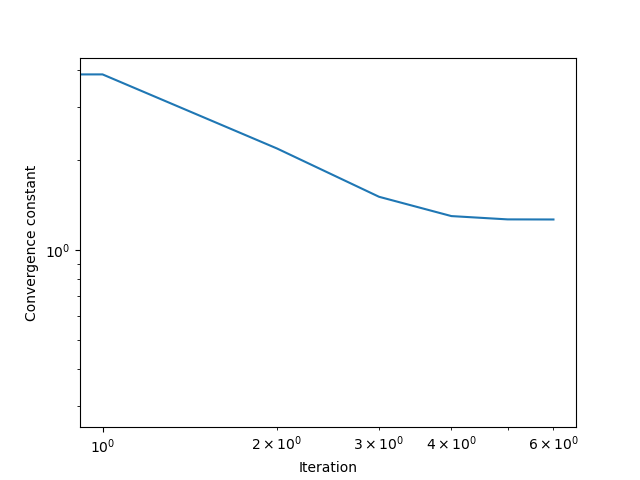

In [16]:
c = np.linalg.norm(np.array([-0.0285, -0.289]) - np.array(status)[:, :2], axis=1)

plt.figure()
plt.loglog(c)
plt.xlabel("Iteration")
plt.ylabel("Convergence constant")
plt.show()

Además, la convergencia depende de la estimación inicial. A continuación, coloreamos la
región $[-2, 2]^2$ según la raíz a la que converge.

In [17]:
def classify_sol(u_ap):
    sols_num = [np.array(sol).astype(float) for sol in sols]
    sol_conv = 0
    err = np.linalg.norm(u_ap - sols_num[0])
    for cont in range(1, 4):
        if np.linalg.norm(u_ap - sols_num[cont]) < err:
            sol_conv = cont
            err = np.linalg.norm(u_ap - sols_num[cont])
    return sol_conv, err

In [18]:
nvals = 501
u2, u1 = 2 * np.mgrid[-1:1:nvals*1j, -1:1:nvals*1j]
u_conv = np.zeros_like(u1)
for row in range(nvals):
    for col in range(nvals):
        u_ini = u1[row, col], u2[row, col]
        u_ap, _ = newton_nonlin_springs((0, 100), u=u_ini)
        sol_conv, err = classify_sol(u_ap)
        u_conv[row, col] = sol_conv

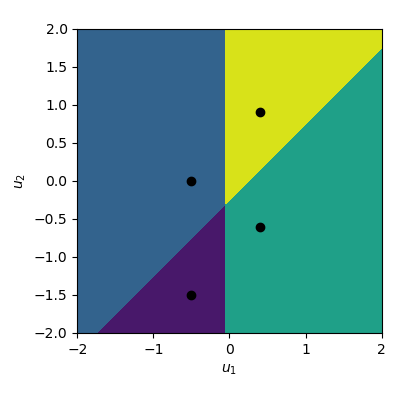

In [19]:
sols_num = np.column_stack([np.array(sol).astype(float) for sol in sols])


plt.figure(figsize=(4, 4))
plt.contourf(u1, u2, u_conv)
plt.plot(sols_num[0, :], sols_num[1, :], "ok", lw=0)
plt.xlabel("$u_1$")
plt.ylabel("$u_2$")
plt.axis("image")
plt.tight_layout()
plt.show()